# Nivelamento Técnico

Este hands-on é focado na interseção de ML e dados de séries temporais, e por isso é esperado que o participante já tenha feito cursos introdutórios de ML e análise de séries temporais.

## Machine Learning

Machine Learning (ML) é um campo da inteligência artificial que usa algoritmos para aprender a partir de dados e fazer previsões ou tomar decisões sem ser explicitamente programado. ML pode ser categorizado em três principais tipos:

- Aprendizado Supervisionado: O modelo é treinado em um conjunto de dados rotulados.
- Aprendizado Não Supervisionado: O modelo encontra padrões ou agrupamentos em dados não rotulados.
- Aprendizado por Reforço: O modelo aprende através de interações com o ambiente e recebe recompensas ou penalidades.

## Séries Temporais

Uma série temporal é uma sequência de pontos de dados ordenados no tempo. Exemplos incluem preços de ações, dados meteorológicos e sinais vitais. As séries temporais podem ser categorizadas de várias maneiras:

- **Univariada:** Uma única variável é medida ao longo do tempo.
- **Multivariada:** Várias variáveis são medidas ao longo do tempo.
- **Estacionária:** As propriedades estatísticas da série não mudam ao longo do tempo.
- **Não Estacionária:** As propriedades estatísticas mudam ao longo do tempo.

## Interseção entre ML e Séries Temporais

Modelos de ML, especialmente os de aprendizado supervisionado de regressão, podem ser aplicados para prever séries temporais. Isso envolve treinar um modelo para prever valores futuros com base em dados históricos.

Exemplo com Python: Regressão Linear para Previsão de Série Temporal
Neste exemplo, é utilizado a biblioteca scikit-learn do python para criar um modelo de regressão linear que prevê valores futuros em uma série temporal.

Bibliotecas necessárias do python para o exemplo:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


1. **Geração de Dados:** a seguir é criada uma série temporal simples com uma tendência linear e uma componente sazonal (por isso a função seno do numpy é utilizada).

In [2]:
# gerando uma série temporal de exemplo
np.random.seed(0)
time = np.arange(100)
data = 0.5 * time + 2 * np.sin(time) + np.random.normal(size=time.size)

2. Preparação dos Dados: Agora será criada uma defasagem (lag) dos dados para usar como variável independente do modelo.

In [3]:
# preparação dos dados para regressão supervisionada
df = pd.DataFrame({'time': time, 'value': data})
df['lag_1'] = df['value'].shift(1)
df.dropna(inplace=True)

3. Divisão dos Dados: A seguir os dados são separados em conjuntos de treino e teste, com 80% dos dados para o conjunto de treino e 20% para o conjunto de dados de teste.

In [4]:
# divisão manual dos dados de treino e teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# definindo as variáveis dependente e independente
X_train, y_train = train[['lag_1']], train['value']
X_test, y_test = test[['lag_1']], test['value']

4. Treinamento do Modelo: Um modelo de regressão linear será treinado usando a biblioteca scikit-learn do python.

In [5]:
# treino do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Previsão e Visualização: A seguir são realizadas previsões com o modelo de ML treinado, o qual é possível comparar visualmente com os valores reais do conjuntod de dados de teste.

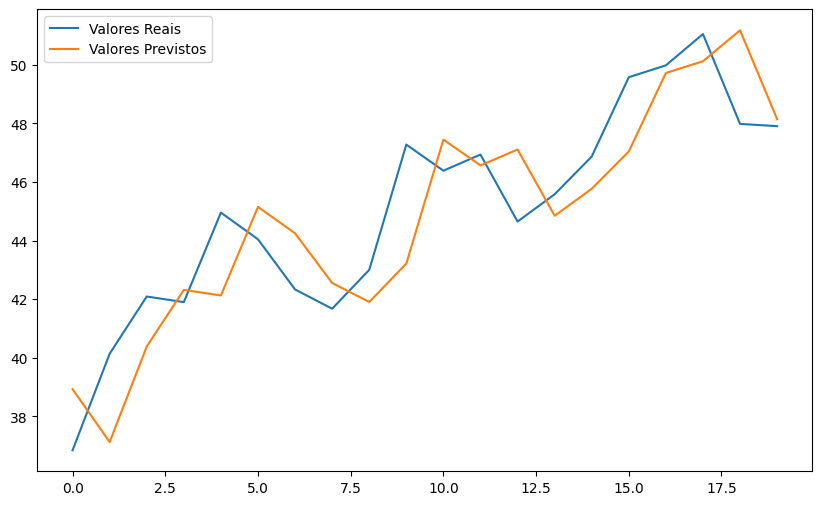

In [6]:
# previsões com o modelo treinado
y_pred = model.predict(X_test)

# visualização dos resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Previstos')
plt.legend()
plt.show()

A previsão de séries temporais usando modelos de regressão supervisionada é uma aplicação interessante de ML. A criação de variáveis adequadas, como variáveis de lag do exemplo, é crucial para o sucesso do modelo.

Bibliotecas como scikit-learn facilitam a implementação e experimentação com diferentes abordagens de ML para séries temporais.